#  Corona vaccine progress 
version 0.91 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-01-13 18:28:17.124857


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Argentina,ARG,Sputnik V,2021-01-08,Government of Argentina,https://www.argentina.gob.ar/noticias/ya-se-ap...
1,Austria,AUT,Pfizer/BioNTech,2021-01-12,Ministry of Health,https://info.gesundheitsministerium.gv.at/data...
2,Bahrain,BHR,"Pfizer/BioNTech, Sinopharm",2021-01-12,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1349090...
3,Belgium,BEL,Pfizer/BioNTech,2021-01-13,Regional governments via covid-vaccinatie.be,https://covid-vaccinatie.be/en
4,Bulgaria,BGR,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://coronavirus.bg/bg/statistika
5,Canada,CAN,"Moderna, Pfizer/BioNTech",2021-01-12,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada
6,Chile,CHL,Pfizer/BioNTech,2021-01-06,Department of Statistics and Health Information,https://deis.minsal.cl/
7,China,CHN,"CNBG, Sinovac",2021-01-13,National Health Commission,https://www.chinadaily.com.cn/a/202101/13/WS5f...
8,Costa Rica,CRI,Pfizer/BioNTech,2021-01-08,National Health Commission,https://www.ccss.sa.cr/noticias/servicios_noti...
9,Croatia,HRV,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://vlada.gov.hr/vijesti/nove-mjere-za-ula...


In [5]:
#order by last updated ascending
countries_csv = countries_csv.sort_values(by=['last_observation_date'],ascending=False)
#countries_csv.reindex(["location"])
countries_csv.reset_index(drop=True, inplace=True)
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Poland,POL,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://twitter.com/szczepimysie/status/134928...
1,Hungary,HUN,Pfizer/BioNTech,2021-01-13,Government of Hungary,https://koronavirus.gov.hu/cikkek/1358-fovel-e...
2,Belgium,BEL,Pfizer/BioNTech,2021-01-13,Regional governments via covid-vaccinatie.be,https://covid-vaccinatie.be/en
3,Bulgaria,BGR,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://coronavirus.bg/bg/statistika
4,Estonia,EST,Pfizer/BioNTech,2021-01-13,National Health Board,https://www.terviseamet.ee/et/uudised
5,Oman,OMN,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://twitter.com/OmaniMOH/status/1349258028...
6,China,CHN,"CNBG, Sinovac",2021-01-13,National Health Commission,https://www.chinadaily.com.cn/a/202101/13/WS5f...
7,Croatia,HRV,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://vlada.gov.hr/vijesti/nove-mjere-za-ula...
8,United Arab Emirates,ARE,"Pfizer/BioNTech, Sinopharm",2021-01-13,National Emergency Crisis and Disaster Managem...,https://twitter.com/NCEMAUAE
9,Israel,ISR,Pfizer/BioNTech,2021-01-13,Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...


## Latest reported

In [6]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:20]

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
419,United Arab Emirates,2021-01-13,"Pfizer/BioNTech, Sinopharm",https://twitter.com/NCEMAUAE/status/1349326115...,1394580,1144580.0,250000,ARE,"Pfizer/BioNTech, Sinopharm",2021-01-13,National Emergency Crisis and Disaster Managem...,https://twitter.com/NCEMAUAE,both
338,Oman,2021-01-13,Pfizer/BioNTech,https://twitter.com/OmaniMOH/status/1349258028...,20649,20649.0,0,OMN,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://twitter.com/OmaniMOH/status/1349258028...,both
144,Estonia,2021-01-13,Pfizer/BioNTech,https://www.terviseamet.ee/et/uudised/covid-19...,13481,13481.0,0,EST,Pfizer/BioNTech,2021-01-13,National Health Board,https://www.terviseamet.ee/et/uudised,both
52,Bulgaria,2021-01-13,Pfizer/BioNTech,https://coronavirus.bg/bg/statistika,15780,15780.0,0,BGR,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://coronavirus.bg/bg/statistika,both
93,China,2021-01-13,"CNBG, Sinovac",https://www.chinadaily.com.cn/a/202101/13/WS5f...,10000000,10000000.0,0,CHN,"CNBG, Sinovac",2021-01-13,National Health Commission,https://www.chinadaily.com.cn/a/202101/13/WS5f...,both
205,Hungary,2021-01-13,Pfizer/BioNTech,https://koronavirus.gov.hu/cikkek/1358-fovel-e...,86929,86929.0,0,HUN,Pfizer/BioNTech,2021-01-13,Government of Hungary,https://koronavirus.gov.hu/cikkek/1358-fovel-e...,both
42,Belgium,2021-01-13,Pfizer/BioNTech,https://covid-vaccinatie.be/en,53726,53726.0,0,BEL,Pfizer/BioNTech,2021-01-13,Regional governments via covid-vaccinatie.be,https://covid-vaccinatie.be/en,both
353,Poland,2021-01-13,Pfizer/BioNTech,https://twitter.com/szczepimysie/status/134928...,309620,309620.0,0,POL,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://twitter.com/szczepimysie/status/134928...,both
236,Israel,2021-01-13,Pfizer/BioNTech,https://datadashboard.health.gov.il/COVID-19/g...,1933294,1880198.0,53096,ISR,Pfizer/BioNTech,2021-01-13,Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,both
103,Croatia,2021-01-13,Pfizer/BioNTech,https://vlada.gov.hr/vijesti/nove-mjere-za-ula...,34553,34553.0,0,HRV,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://vlada.gov.hr/vijesti/nove-mjere-za-ula...,both


In [7]:
#Countries in list
allCountries["location"].value_counts()

Canada                  30
Israel                  26
Bahrain                 21
Italy                   17
Estonia                 16
Greece                  16
Denmark                 16
Romania                 16
Germany                 16
Oman                    15
Poland                  15
Mexico                  14
United States           14
Lithuania               14
Norway                  13
Hungary                 12
Latvia                  12
Slovenia                10
Belgium                 10
Bulgaria                10
United Arab Emirates     8
Austria                  8
Netherlands              7
Croatia                  7
Chile                    7
Finland                  7
Wales                    6
Northern Ireland         6
France                   6
Scotland                 6
Portugal                 6
Spain                    6
United Kingdom           5
England                  5
Slovakia                 5
China                    4
Ireland                  4
A

In [8]:
allCountries.groupby(["location", "vaccine"]).size()

location              vaccine                            
Argentina             Sputnik V                               4
Austria               Pfizer/BioNTech                         8
Bahrain               Pfizer/BioNTech, Sinopharm             21
Belgium               Pfizer/BioNTech                        10
Bulgaria              Pfizer/BioNTech                        10
Canada                Moderna, Pfizer/BioNTech               13
                      Pfizer/BioNTech                        17
Chile                 Pfizer/BioNTech                         7
China                 CNBG, Sinovac                           4
Costa Rica            Pfizer/BioNTech                         3
Croatia               Pfizer/BioNTech                         7
Cyprus                Pfizer/BioNTech                         2
Czechia               Pfizer/BioNTech                         2
Denmark               Pfizer/BioNTech                        16
England               Oxford/AstraZeneca, Pfiz

In [9]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 438
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 422 non-null    object        
 1   date                     422 non-null    datetime64[ns]
 2   vaccine                  422 non-null    object        
 3   source_url               422 non-null    object        
 4   total_vaccinations       422 non-null    int64         
 5   people_vaccinated        418 non-null    float64       
 6   people_fully_vaccinated  422 non-null    int64         
 7   iso_code                 422 non-null    object        
 8   vaccines                 422 non-null    object        
 9   last_observation_date    422 non-null    object        
 10  source_name              422 non-null    object        
 11  source_website           422 non-null    object        
 12  _merge                   422 non-nul

In [10]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape)


30 663 054 (47, 3)


## Charts

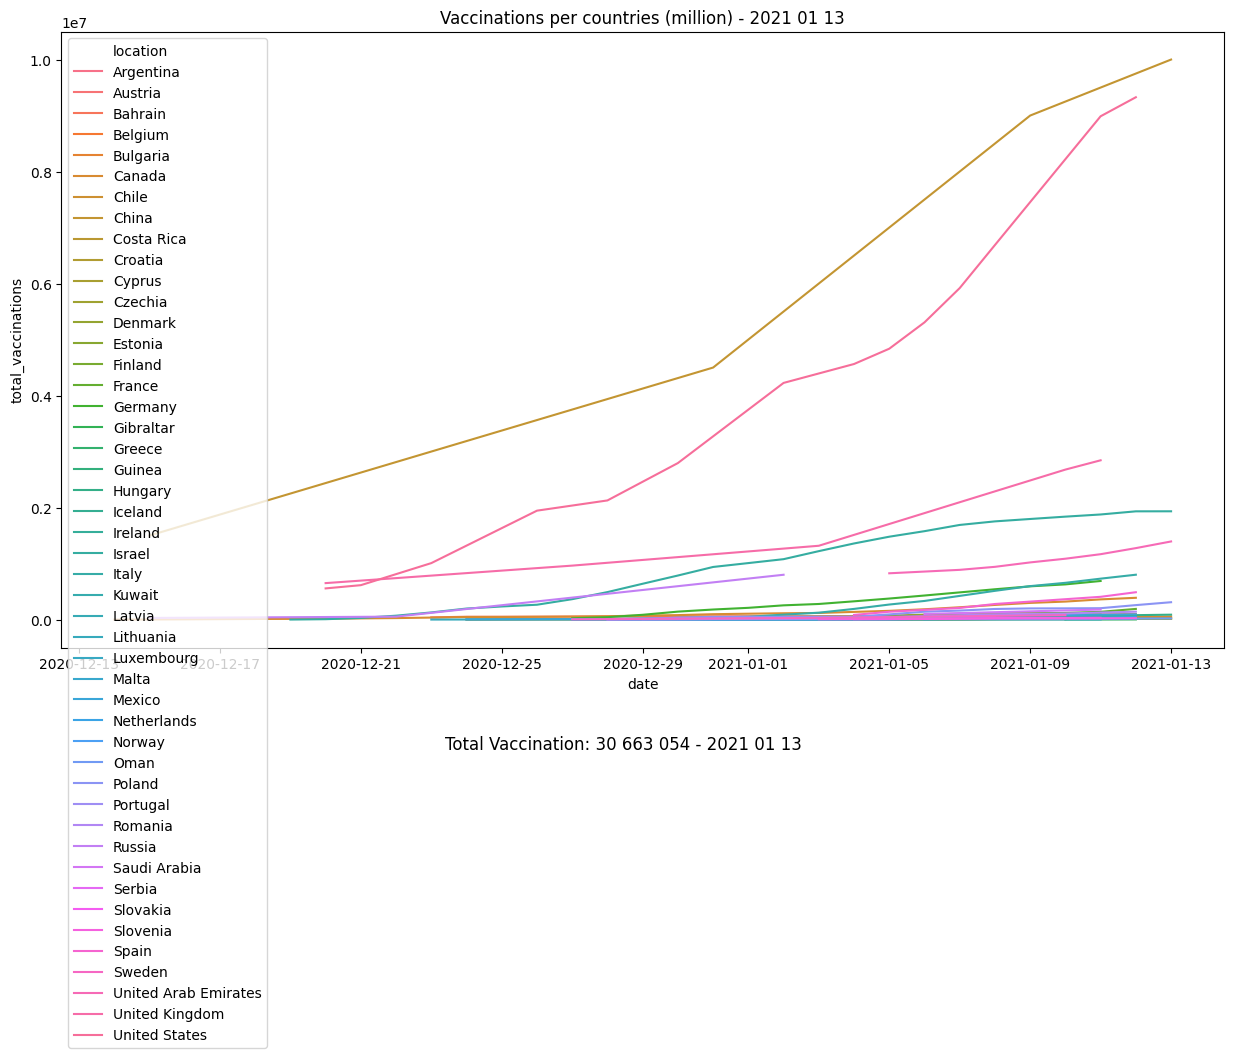

In [11]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str  + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


In [12]:
allCountriesFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 438
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 422 non-null    object        
 1   date                     422 non-null    datetime64[ns]
 2   vaccine                  422 non-null    object        
 3   source_url               422 non-null    object        
 4   total_vaccinations       422 non-null    int64         
 5   people_vaccinated        418 non-null    float64       
 6   people_fully_vaccinated  422 non-null    int64         
 7   iso_code                 422 non-null    object        
 8   vaccines                 422 non-null    object        
 9   last_observation_date    422 non-null    object        
 10  source_name              422 non-null    object        
 11  source_website           422 non-null    object        
 12  _merge                   422 non-nul

In [13]:
# Resample dates Forward filling and sum

#allCountriesFiltered
#grouper = allCountriesFiltered.groupby([pd.Grouper(key="date",freq='1D'), 'location']).mean() 


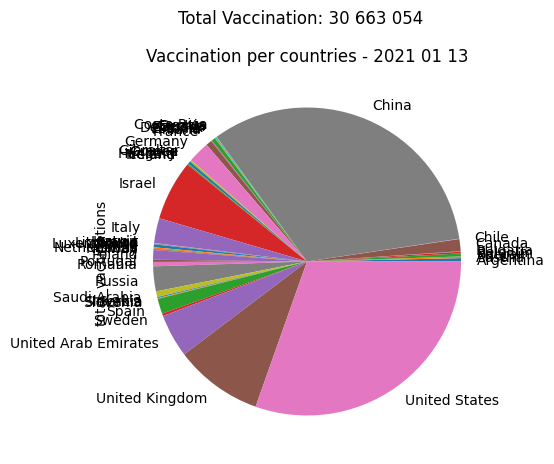

In [14]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [15]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,vaccine,iso_code
location,,,
China,10000000,"CNBG, Sinovac",CHN
United States,9327138,"Moderna, Pfizer/BioNTech",USA
United Kingdom,2843815,"Oxford/AstraZeneca, Pfizer/BioNTech",GBR
Israel,1933294,Pfizer/BioNTech,ISR
United Arab Emirates,1394580,"Pfizer/BioNTech, Sinopharm",ARE
Italy,800730,Pfizer/BioNTech,ITA
Russia,800000,Sputnik V,RUS
Germany,688782,Pfizer/BioNTech,DEU
Spain,488122,Pfizer/BioNTech,ESP


In [16]:
plotLatestCountries.shape

(47, 3)

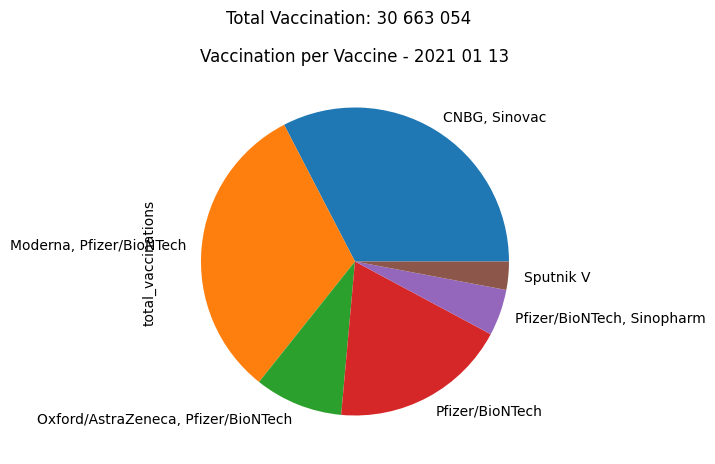

In [17]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [18]:
plotVaccine.sort_values(ascending=True)

vaccine
Sputnik V                                907567
Pfizer/BioNTech, Sinopharm              1492356
Oxford/AstraZeneca, Pfizer/BioNTech     2843815
Pfizer/BioNTech                         5703685
Moderna, Pfizer/BioNTech                9715631
CNBG, Sinovac                          10000000
Name: total_vaccinations, dtype: int64

In [19]:
# Sweden have 10 000 doses....
#allCountries

In [20]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-13 18:28:33.321531
Time elapsed (hh:mm:ss.ms) 0:00:16.196865


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [21]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  194 non-null    object
 1   continent            194 non-null    object
 2   memberEU             194 non-null    object
 3   country              194 non-null    object
 4   qid                  194 non-null    object
 5   population           194 non-null    object
 6   ISO3166_1            194 non-null    object
 7   nominalGDPperCapita  191 non-null    object
 8   G20                  194 non-null    object
 9   IMF                  194 non-null    object
 10  genderH              194 non-null    object
dtypes: object(11)
memory usage: 16.8+ KB


In [22]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
158,http://www.wikidata.org/entity/Q784,North America,false,Dominica,Q784,73925,DMA,6719,false,false,male
17,http://www.wikidata.org/entity/Q833,Asia,false,Malaysia,Q833,31624264,MYS,9951,false,false,male
93,http://www.wikidata.org/entity/Q869,Asia,false,Thailand,Q869,65931550,THA,6595,false,false,male
137,http://www.wikidata.org/entity/Q1033,Africa,false,Nigeria,Q1033,190886311,NGA,1968,false,false,male
174,http://www.wikidata.org/entity/Q974,Africa,false,Democratic Republic of the Congo,Q974,86790567,COD,462,false,false,male


In [23]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Argentina,107542,Sputnik V,ARG
Austria,52925,Pfizer/BioNTech,AUT
Bahrain,97776,"Pfizer/BioNTech, Sinopharm",BHR
Belgium,53726,Pfizer/BioNTech,BEL
Bulgaria,15780,Pfizer/BioNTech,BGR
Canada,388493,"Moderna, Pfizer/BioNTech",CAN
Chile,10699,Pfizer/BioNTech,CHL
China,10000000,"CNBG, Sinovac",CHN
Costa Rica,9751,Pfizer/BioNTech,CRI


In [24]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,107542,Sputnik V,ARG,http://www.wikidata.org/entity/Q414,South America,false,Argentina,Q414,44938712,ARG,14398,true,false,male,both
1,52925,Pfizer/BioNTech,AUT,http://www.wikidata.org/entity/Q40,Europe,true,Austria,Q40,8809212,AUT,44920,false,false,male,both
2,97776,"Pfizer/BioNTech, Sinopharm",BHR,http://www.wikidata.org/entity/Q398,Asia,false,Bahrain,Q398,1492584,BHR,23739,false,false,male,both
3,53726,Pfizer/BioNTech,BEL,http://www.wikidata.org/entity/Q31,Europe,true,Belgium,Q31,11431406,BEL,43467,false,false,male,both
4,15780,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,Bulgaria,Q219,7000039,BGR,8228,false,false,male,both
5,388493,"Moderna, Pfizer/BioNTech",CAN,http://www.wikidata.org/entity/Q16,North America,false,Canada,Q16,37894799,CAN,44870,true,false,male,both
6,10699,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,Chile,Q298,18054726,CHL,15346,false,false,male,both
7,10000000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,People's Republic of China,Q148,1409517397,CHN,8826,true,false,male,both
8,9751,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,Costa Rica,Q800,4905769,CRI,11677,false,false,male,both
9,34553,Pfizer/BioNTech,HRV,http://www.wikidata.org/entity/Q224,Europe,true,Croatia,Q224,4105493,HRV,13386,false,false,male,both


In [25]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   total_vaccinations   46 non-null     int64   
 1   vaccine              46 non-null     object  
 2   iso_code             46 non-null     object  
 3   cid                  46 non-null     object  
 4   continent            46 non-null     object  
 5   memberEU             46 non-null     int64   
 6   country              46 non-null     object  
 7   qid                  46 non-null     object  
 8   population           46 non-null     int64   
 9   ISO3166_1            46 non-null     object  
 10  nominalGDPperCapita  45 non-null     float64 
 11  G20                  46 non-null     int64   
 12  IMF                  46 non-null     int64   
 13  genderH              46 non-null     object  
 14  _merge               46 non-null     category
 15  genderFlag           46 n

In [26]:
#CountriesData

In [27]:
CountriesData['Country'] = CountriesData.index

In [28]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.322943
population                         0.830182
nominalGDPperCapita                0.059049
G20                                0.462455
IMF                               -0.008856
genderFlag                         0.114773
Country                            0.126096
vaccinations_population_percent    0.183379
Name: total_vaccinations, dtype: float64

In [29]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.183379
memberEU                          -0.292825
population                        -0.037381
nominalGDPperCapita                0.144362
G20                               -0.069383
IMF                               -0.044619
genderFlag                         0.085958
Country                            0.133589
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [30]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


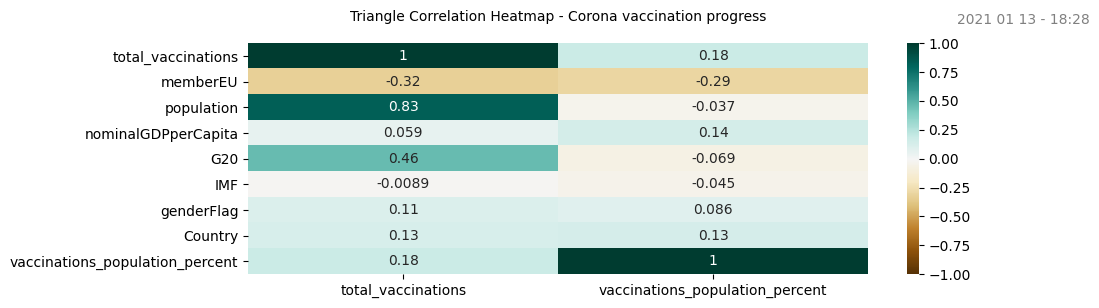

In [31]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [32]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,continent,memberEU,G20,vaccinations_population_percent,IMF,country,population,total_vaccinations
22,Asia,0,0,21.261344,0,Israel,9093000,1933294
43,Asia,0,0,14.835729,0,United Arab Emirates,9400145,1394580
2,Asia,0,0,6.550787,0,Bahrain,1492584,97776
44,Europe,0,1,4.307357,0,United Kingdom,66022273,2843815
45,North America,0,1,2.841565,0,United States of America,328239523,9327138
12,Europe,1,0,2.009519,0,Denmark,5827463,117104
20,Europe,0,0,1.365355,0,Iceland,357050,4875
23,Europe,1,1,1.327536,1,Italy,60317000,800730
40,Europe,1,0,1.183523,0,Slovenia,2066880,24462
41,Europe,1,0,1.044490,0,Spain,46733038,488122


## Vaccination numbers % of population

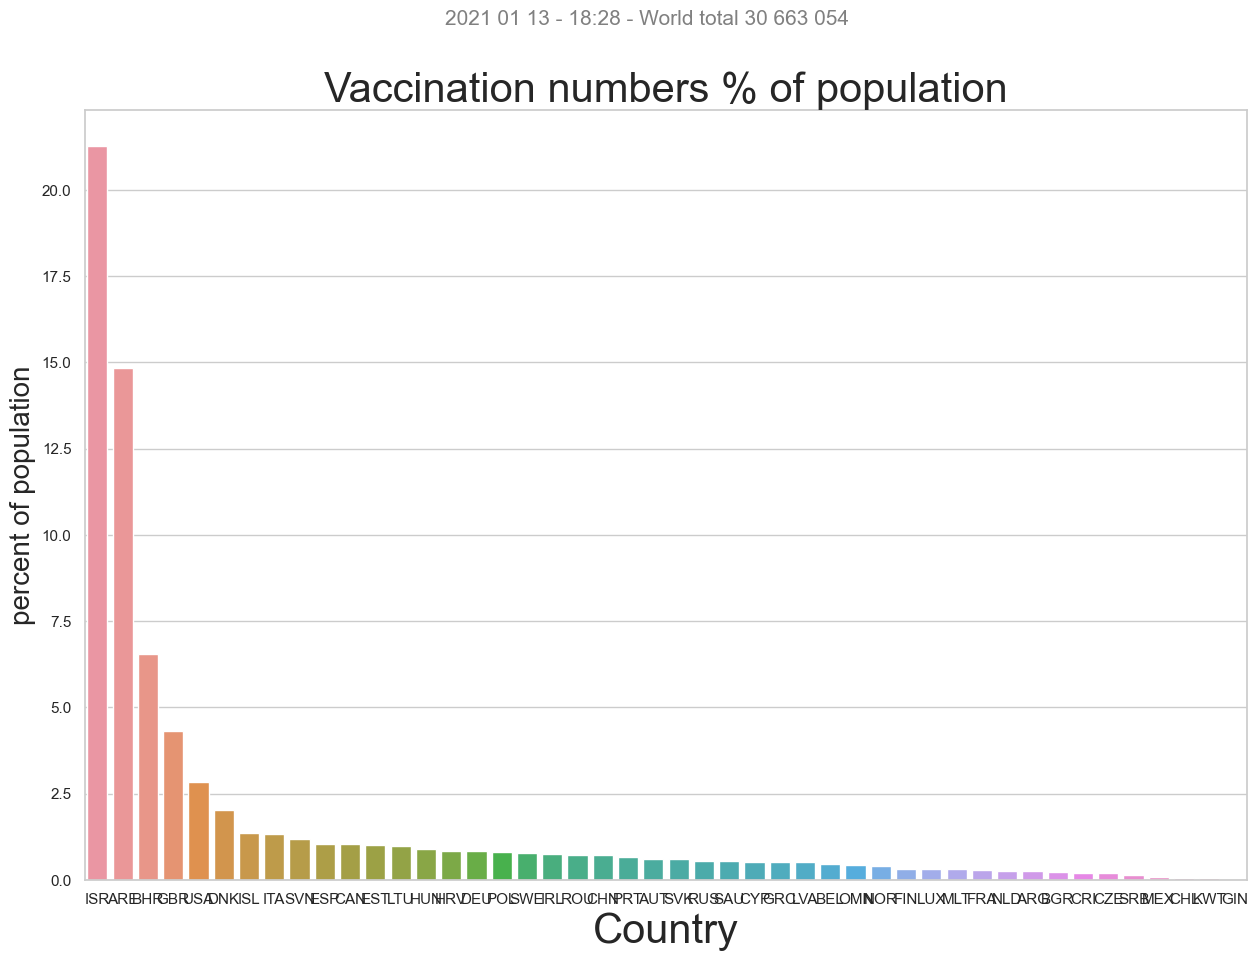

In [33]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

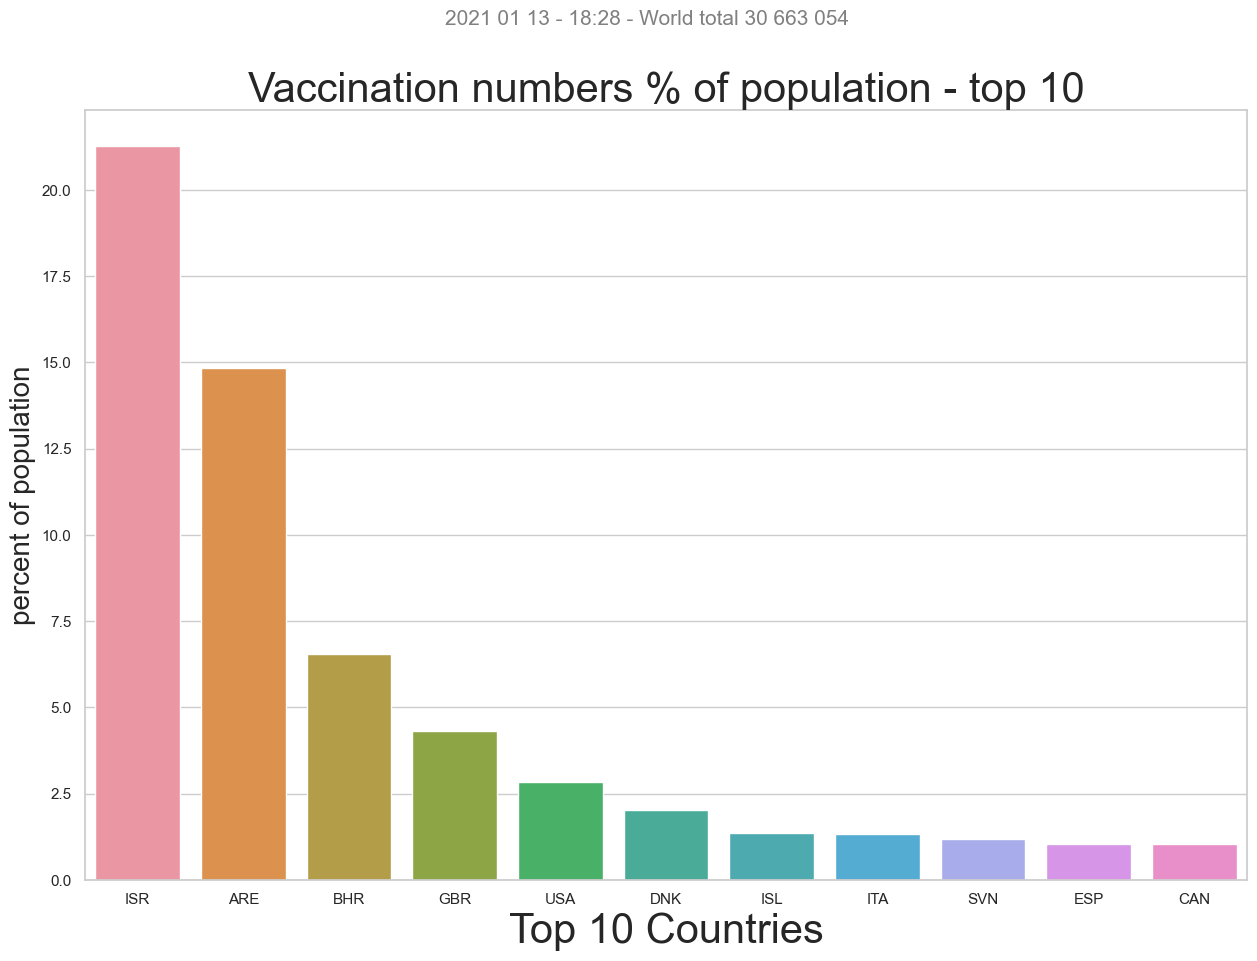

In [34]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

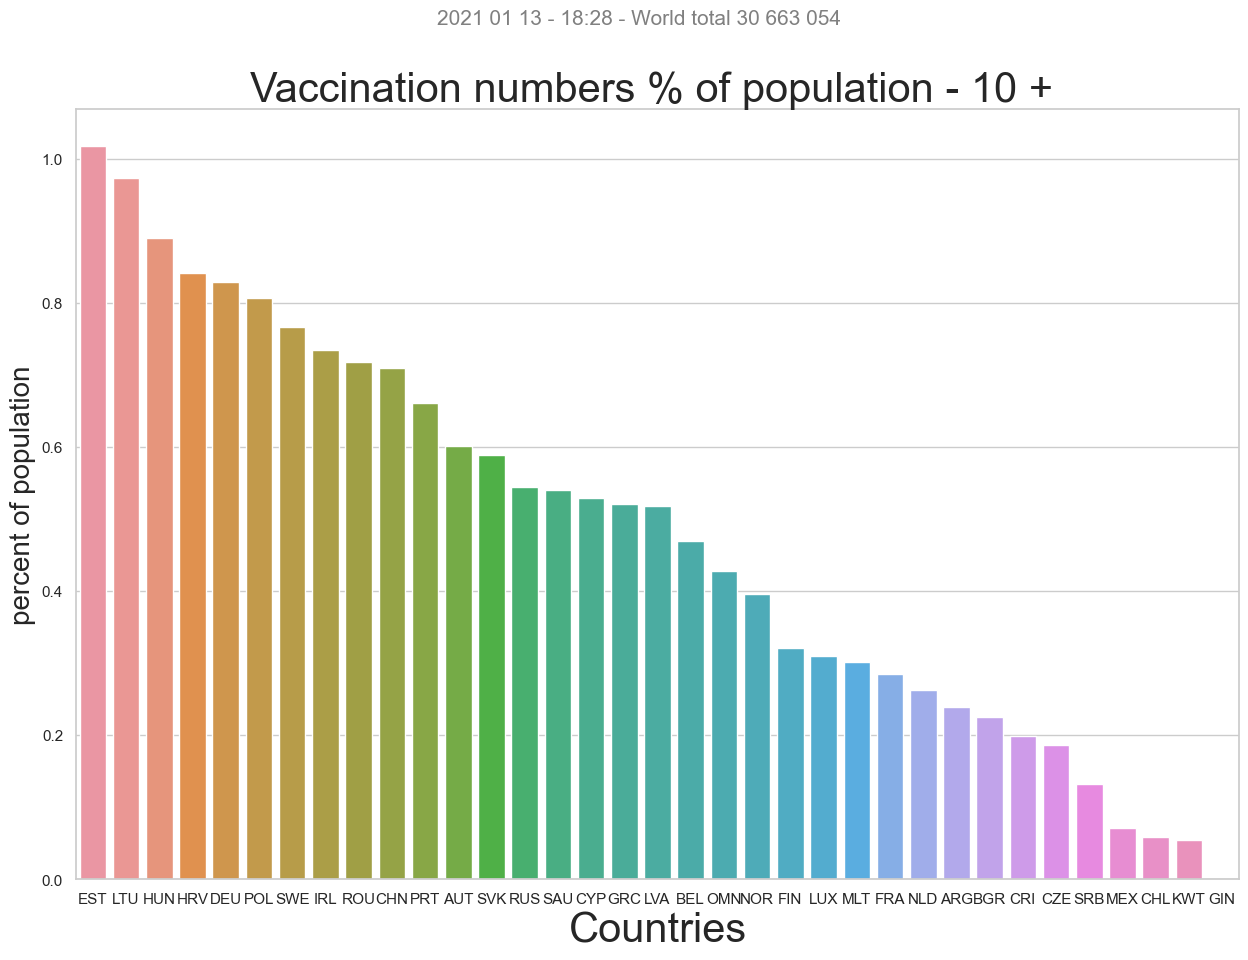

In [35]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

## Scatter plots

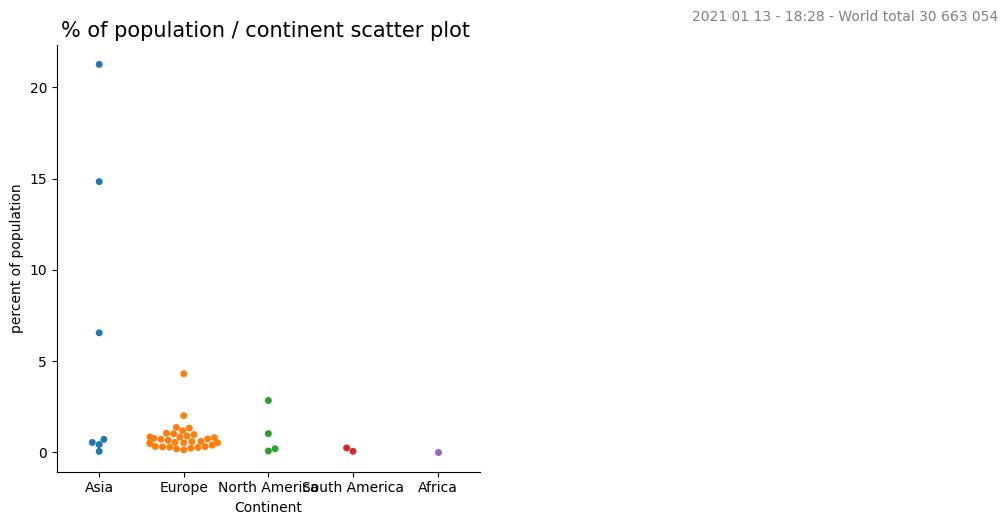

In [36]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

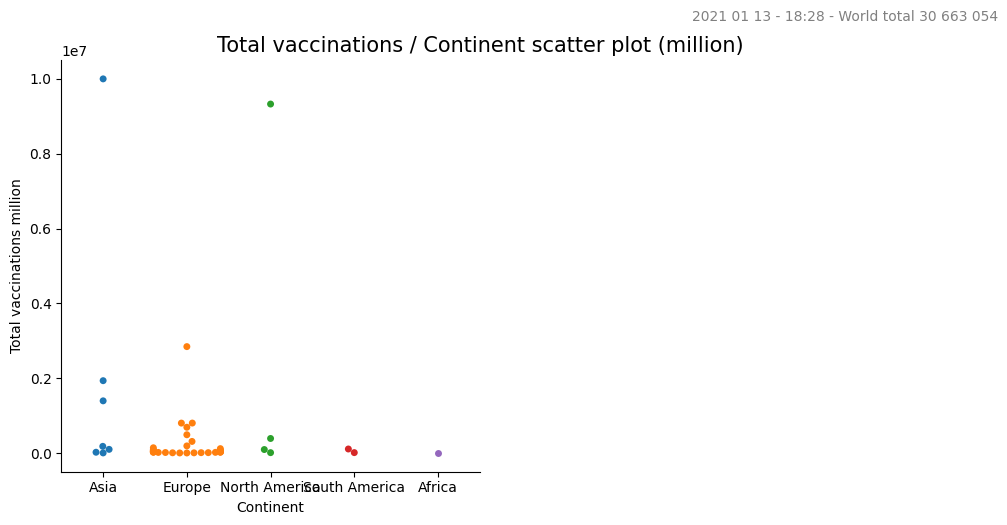

In [37]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [38]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

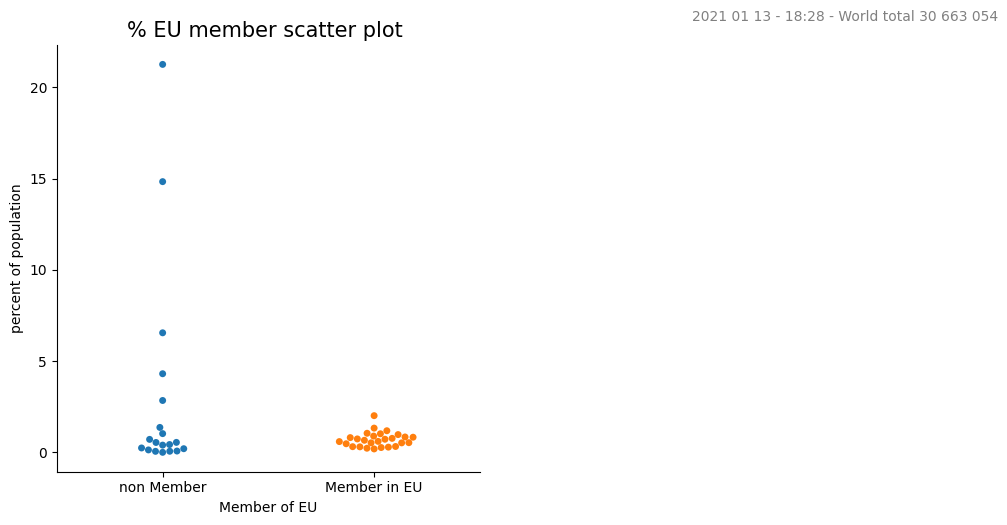

In [39]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

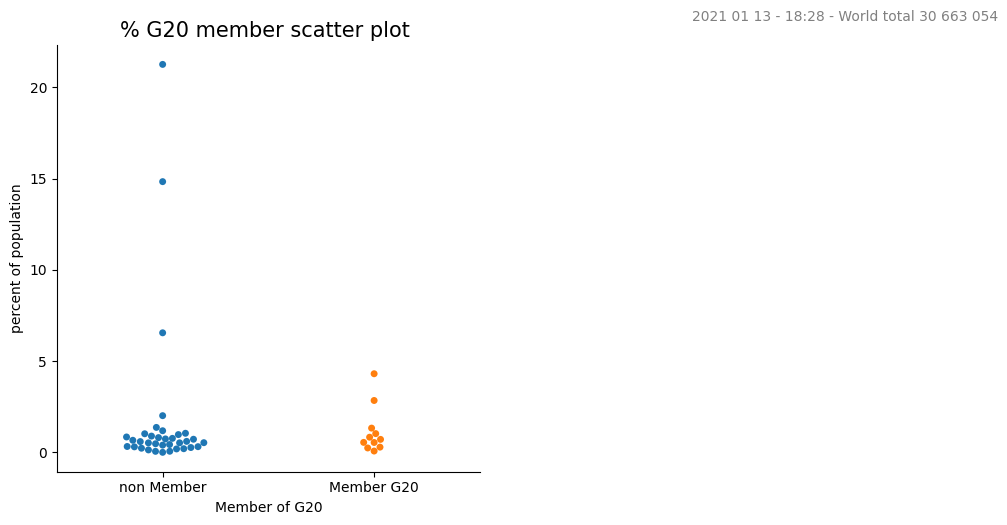

In [40]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

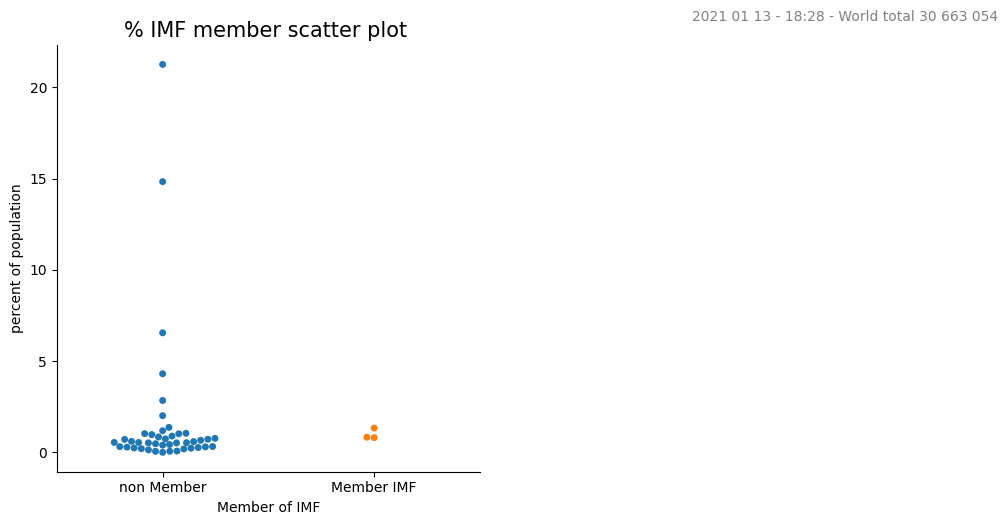

In [41]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [42]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


30 663 054 (47, 3) 7 096 890


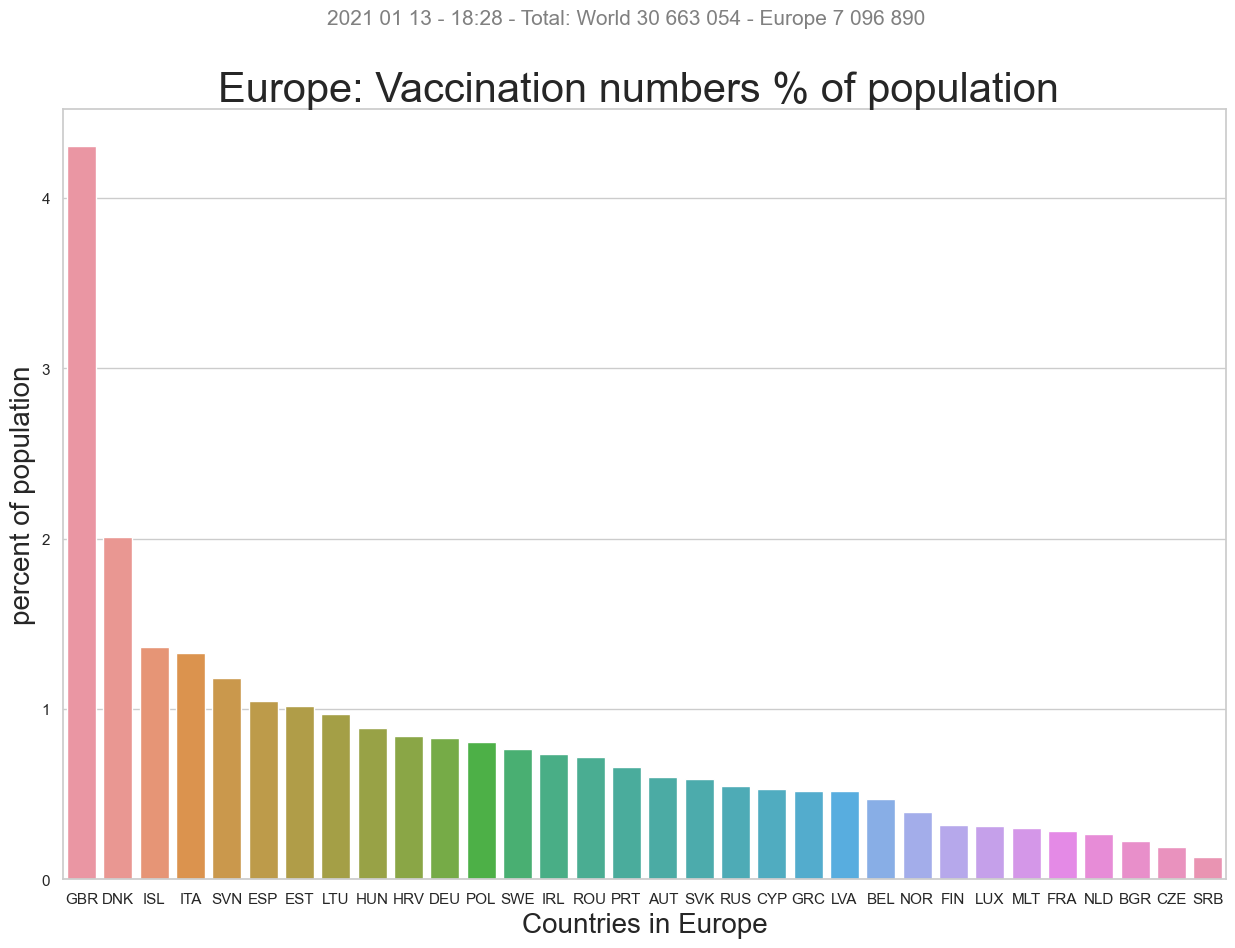

In [43]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [44]:
#CountriesDataEurope

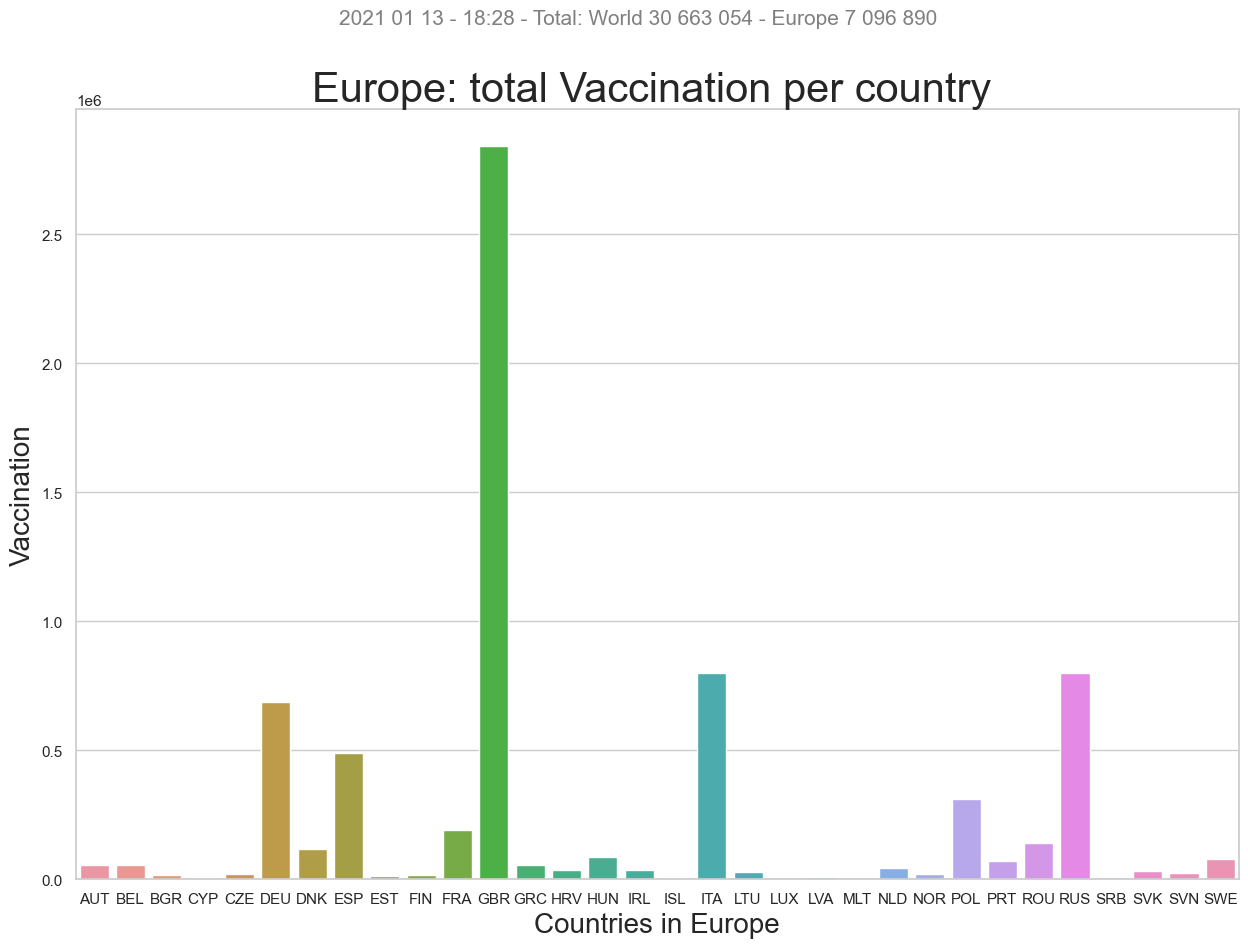

In [45]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [46]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,country_x,ISO3166_1,vaccinations_population_percent,head_gender,total_vaccinations,memberEU
13,Albania,ALB,0.000000,male,0.0,non Member
37,Andorra,AND,0.000000,male,0.0,non Member
2,Armenia,ARM,0.000000,male,0.0,non Member
35,Austria,AUT,0.600792,male,52925.0,Member in EU
6,Azerbaijan,AZE,0.000000,male,0.0,non Member
1,Belgium,BEL,0.469986,male,53726.0,Member in EU
49,Bulgaria,BGR,0.225427,male,15780.0,Member in EU
9,Bosnia and Herzegovina,BIH,0.000000,male,0.0,non Member
16,Belarus,BLR,0.000000,male,0.0,non Member
30,Switzerland,CHE,0.000000,male,0.0,non Member


## All countries on continent Europe

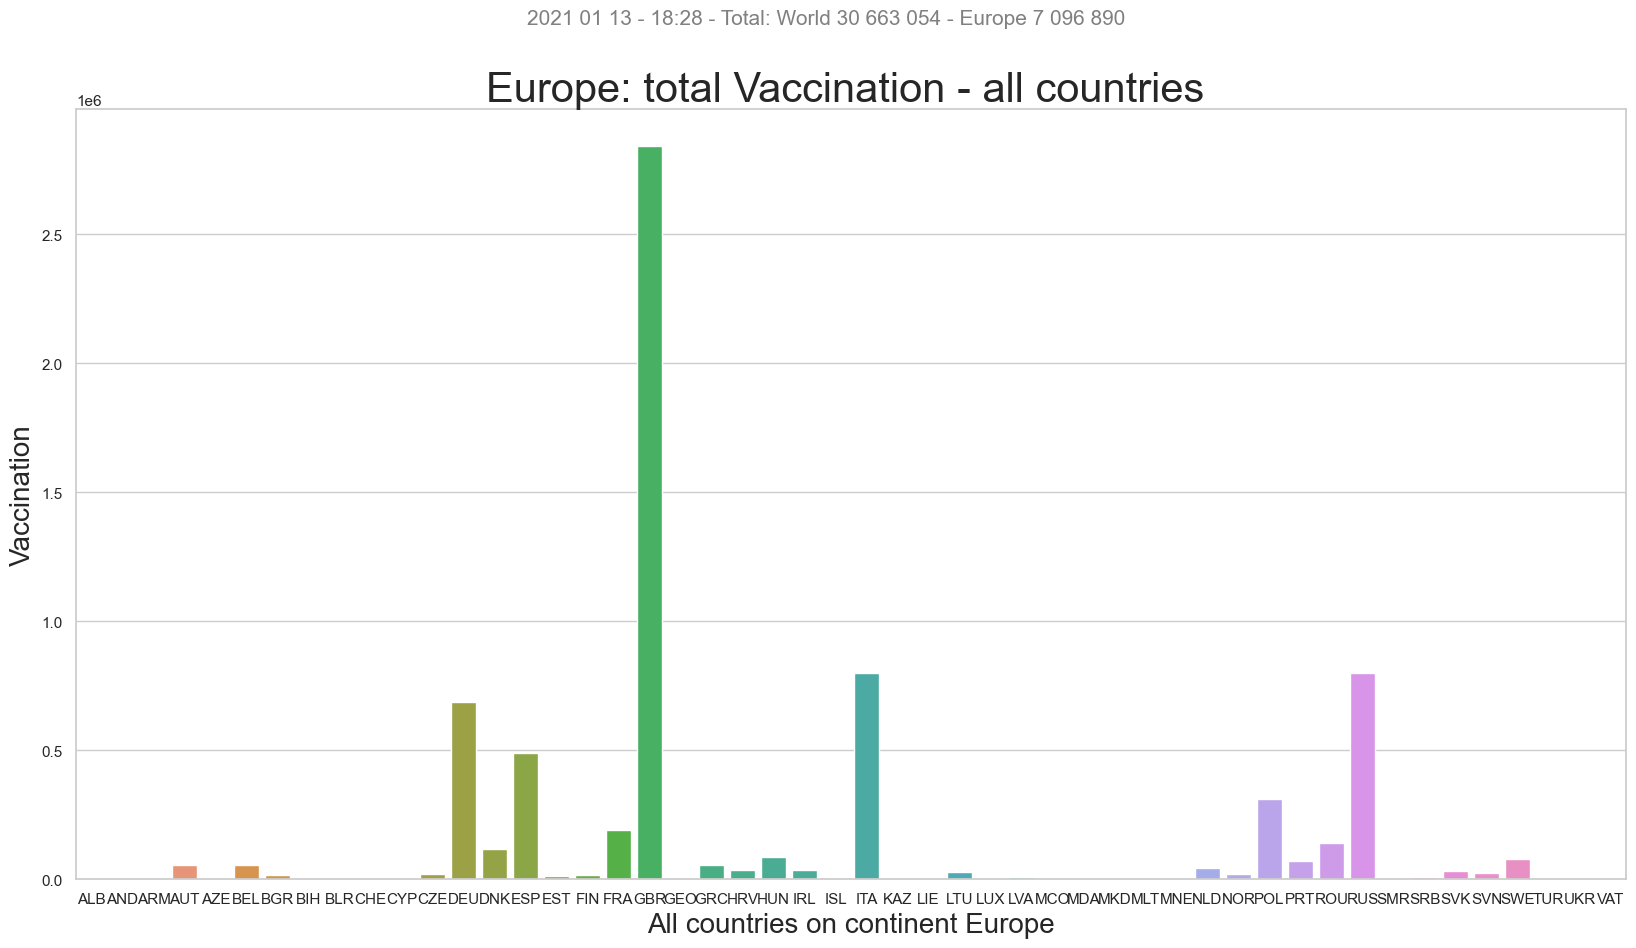

In [47]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [48]:
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 13 to 39
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_x                        50 non-null     object 
 1   ISO3166_1                        50 non-null     object 
 2   vaccinations_population_percent  50 non-null     float64
 3   head_gender                      50 non-null     object 
 4   total_vaccinations               50 non-null     float64
 5   memberEU                         50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [49]:
CountriesDataEuropeAll


,country_x,ISO3166_1,vaccinations_population_percent,head_gender,total_vaccinations,memberEU
13,Albania,ALB,0.000000,male,0.0,non Member
37,Andorra,AND,0.000000,male,0.0,non Member
2,Armenia,ARM,0.000000,male,0.0,non Member
35,Austria,AUT,0.600792,male,52925.0,Member in EU
6,Azerbaijan,AZE,0.000000,male,0.0,non Member
1,Belgium,BEL,0.469986,male,53726.0,Member in EU
49,Bulgaria,BGR,0.225427,male,15780.0,Member in EU
9,Bosnia and Herzegovina,BIH,0.000000,male,0.0,non Member
16,Belarus,BLR,0.000000,male,0.0,non Member
30,Switzerland,CHE,0.000000,male,0.0,non Member


### Countries in EU

In [50]:
#CountriesDataEuropeEU[CountriesDataEuropeEU["ISO3166_1"] == "RUS"]
#CountriesDataEuropeEU
CountriesDataEuropeAll.rename(columns = {'country_x': 'country'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'ISO3166_1': 'ISO3166-1'}, inplace = True)

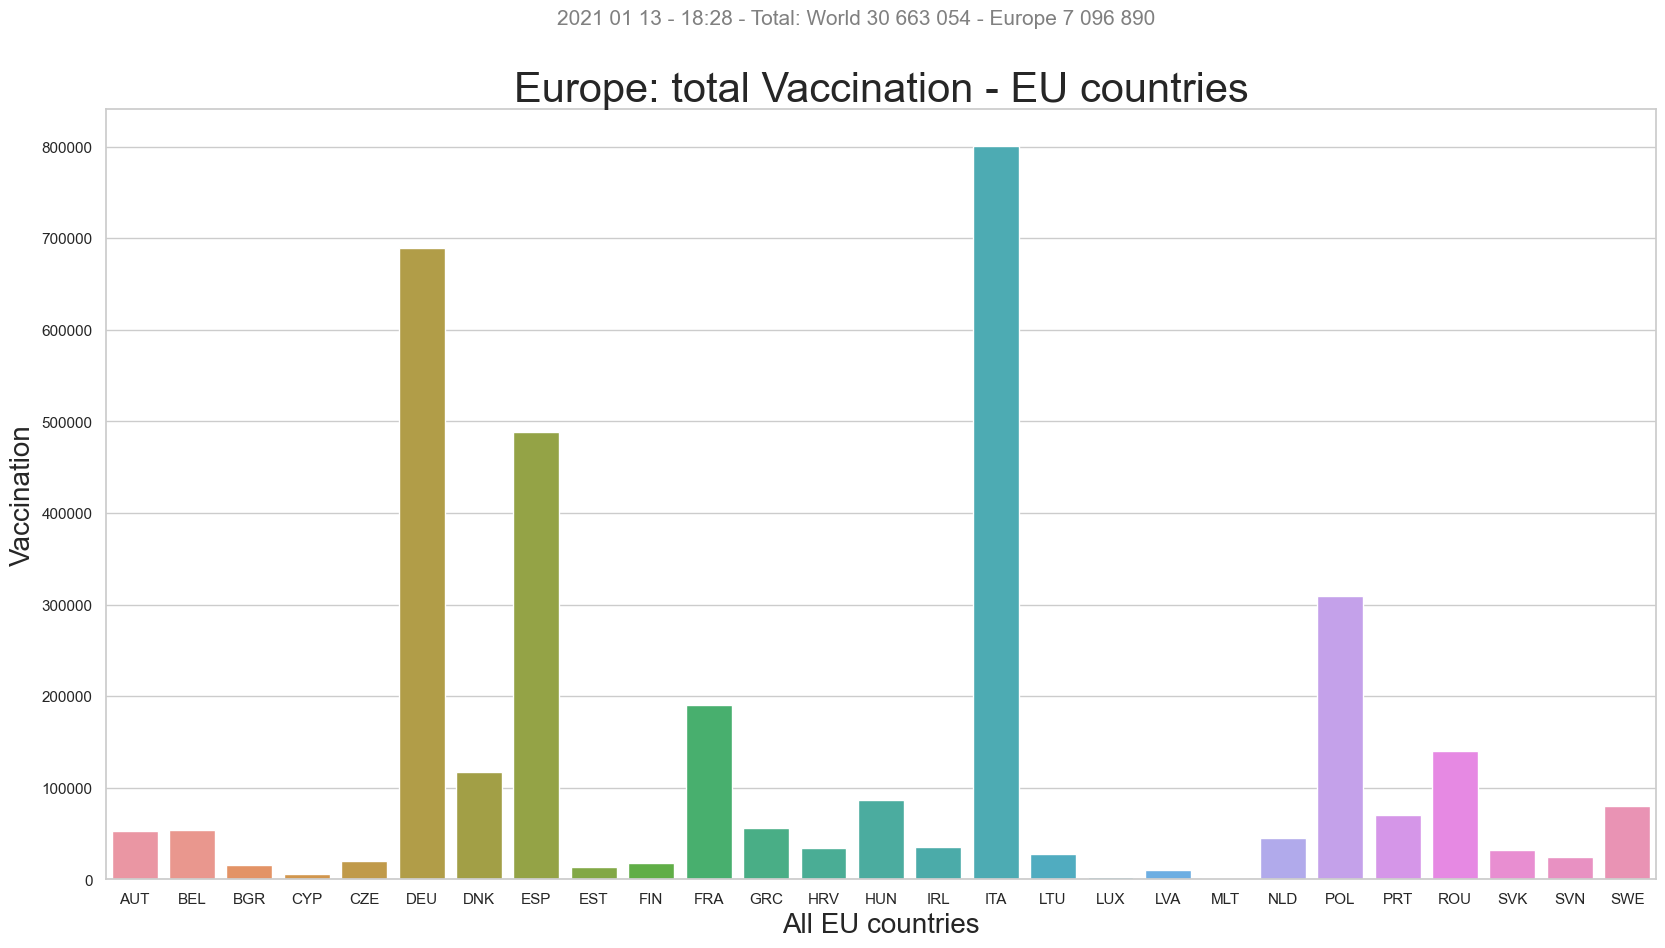

In [51]:
CountriesDataEuropeEU = CountriesDataEuropeAll[CountriesDataEuropeAll["memberEU"] == "Member in EU"]

plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "total_vaccinations", data=CountriesDataEuropeEU). \
            set_title("Europe: total Vaccination - EU countries", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
#plt.annotate('actual group', xy=(x+0.2,y), xytext=(x+0.3, 300),
#             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
#for p in ax.patches:
#    print(p)

plt.savefig("images/EU_VaccinationperCountry.png",bbox_inches="tight")
plt.show()

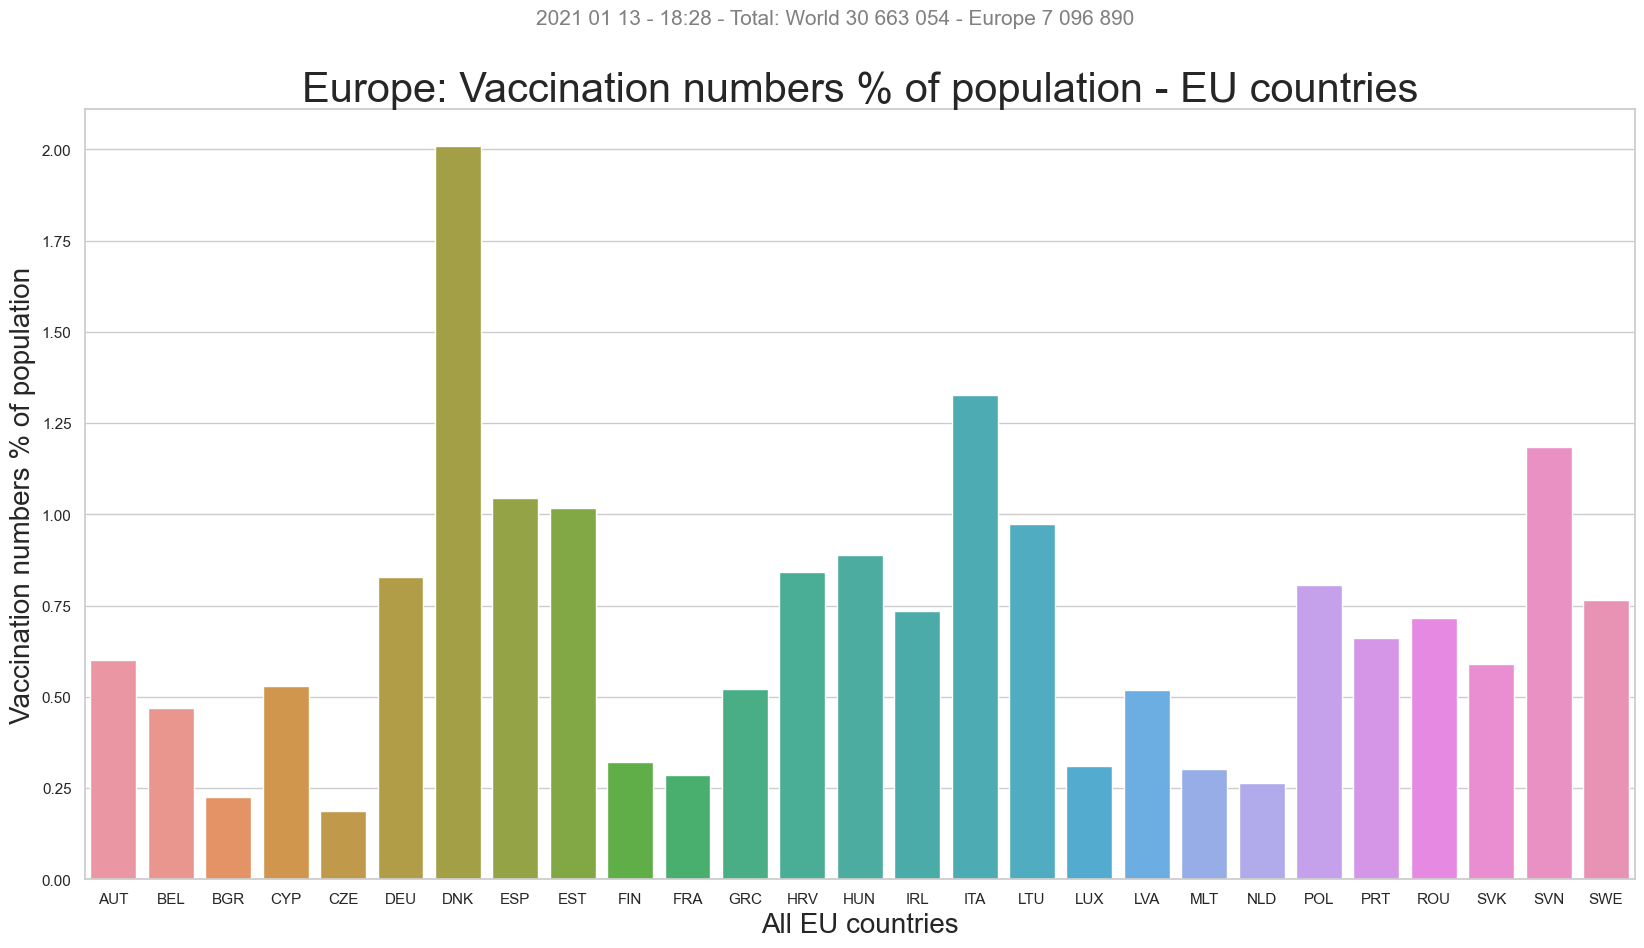

In [52]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "vaccinations_population_percent", data=CountriesDataEuropeEU). \
            set_title("Europe: Vaccination numbers % of population - EU countries", \
                      fontsize=30)
style = dict(size=10, color='gray')

plt.ylabel("Vaccination numbers % of population",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/EU_PercentVaccinationperCountry.png",bbox_inches="tight")
plt.show()

In [53]:
CountriesDataEuropeEU
#WDpopulationEuropeEU

,country,ISO3166-1,vaccinations_population_percent,head_gender,total_vaccinations,memberEU
35,Austria,AUT,0.600792,male,52925.0,Member in EU
1,Belgium,BEL,0.469986,male,53726.0,Member in EU
49,Bulgaria,BGR,0.225427,male,15780.0,Member in EU
14,Cyprus,CYP,0.528845,male,6035.0,Member in EU
19,Czech Republic,CZE,0.186255,male,19918.0,Member in EU
8,Germany,DEU,0.828368,female,688782.0,Member in EU
41,Denmark,DNK,2.009519,female,117104.0,Member in EU
27,Spain,ESP,1.044490,male,488122.0,Member in EU
21,Estonia,EST,1.017572,male,13481.0,Member in EU
36,Finland,FIN,0.320248,female,17617.0,Member in EU


### Countries in EU not delivering Vaccination statistics

In [54]:
CountriesDataEuropeAll[(CountriesDataEuropeAll["memberEU"] == "Member in EU") & \
(CountriesDataEuropeAll["total_vaccinations"] == 0 )][{"total_vaccinations","country","ISO3166-1","memberEU"}]

,ISO3166-1,country,total_vaccinations,memberEU


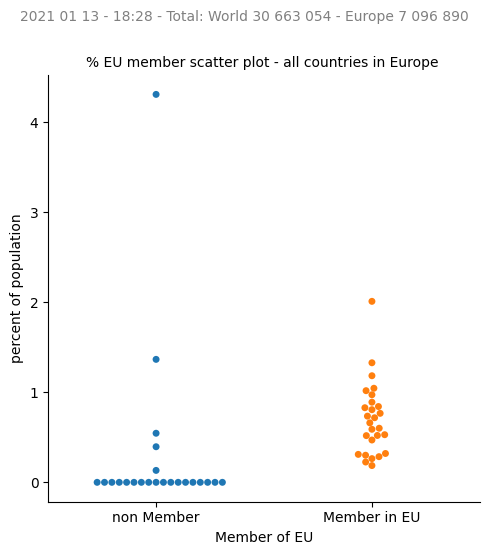

In [55]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [56]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 13 to 39
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          50 non-null     object 
 1   ISO3166-1                        50 non-null     object 
 2   vaccinations_population_percent  50 non-null     float64
 3   head_gender                      50 non-null     object 
 4   total_vaccinations               50 non-null     float64
 5   memberEU                         50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [57]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

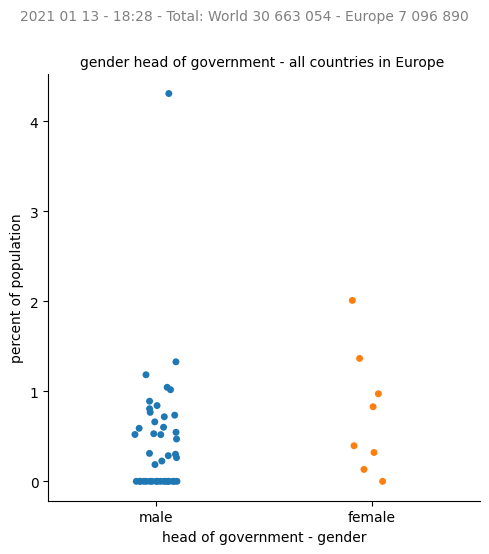

In [58]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

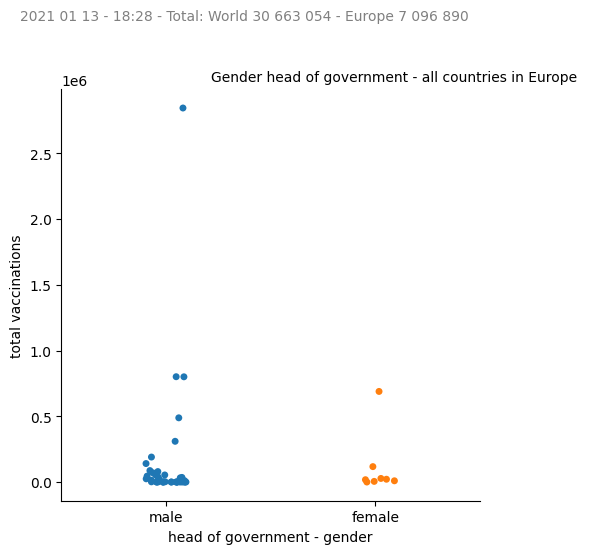

In [59]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [60]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

30 663 054 (47, 3) 7 096 890 (32, 21)


In [61]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-13 18:28:49.018054
Time elapsed (hh:mm:ss.ms) 0:00:31.893499


In [62]:
#The Global State of Democracy Indices
#stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
#df = pd.read_stata(stata_democracy_indices)